### Graduate Rotational Internship Program

### TASK1-Data Science and Business Analytics Intership

### By Anamika Kumari Intern at The Sparks Foundation

#### In this task we have to predict the percentage score of a student based on the number of hours studied. The task has two variables where the feature is the no. of hours studied and the percentage score which has to be solved using simple linear regression.


In [71]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import statsmodels.formula.api as smf
print("All Packages installed")

All Packages installed


### Reading data from remote url 

In [6]:
data="https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv"
df=pd.read_csv(data)
df.head(10)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


### Exploring the Data

In [9]:
df.columns

Index(['Hours', 'Scores'], dtype='object')

In [11]:
df.dtypes

Hours     float64
Scores      int64
dtype: object

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [13]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [14]:
df.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


### Outlier Removal

In [16]:
def null_detection(df):
    num_cols=[]
    
    count=0
    t=[]
    for i in num_cols:
        z=np.abs(stats.zscore(df[i]))
        for j in range(len(z)):
            if z[j]>3 or z[j]<-3:
                t.append(j)
                count+=1
    df=df.drop(list(set(t)))
    df=df.reset_index()
    df=df.drop('index',axis=1)
    print(count)
    return df
        

In [17]:
df = null_detection(df)

0


 ### Visualizing the dataset

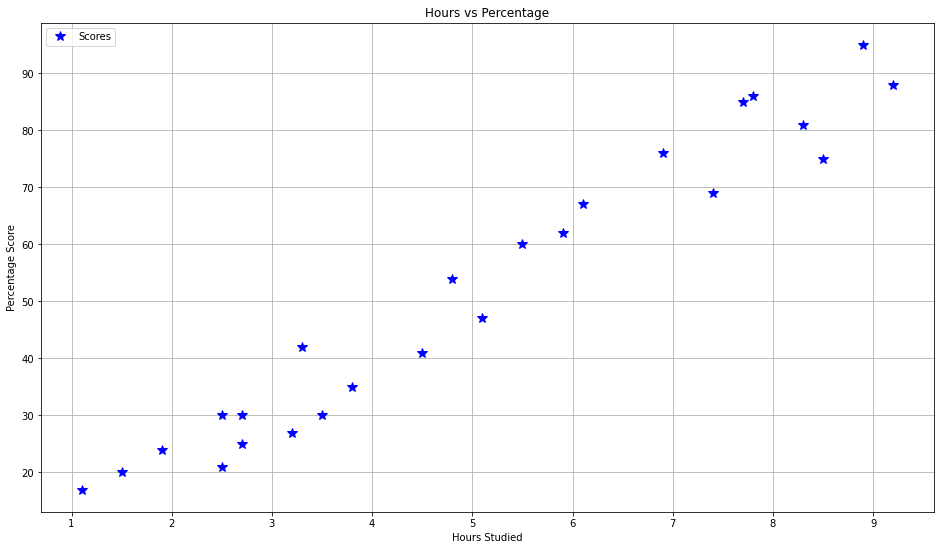

In [84]:
plt.rcParams["figure.figsize"]=[16,9]
df.plot(x='Hours', y='Scores', style='*', color='blue', markersize=10)
plt.title('Hours vs Percentage')
plt.xlabel('Hours Studied')
plt.ylabel('Percentage Score')
plt.grid()
plt.show()

In [93]:
df.corr(method='pearson')

,Hours,Scores,predicted_Scores,pred_ols
Hours,1.000000,0.976191,1.000000,1.000000
Scores,0.976191,1.000000,0.976191,0.976191
predicted_Scores,1.000000,0.976191,1.000000,1.000000
pred_ols,1.000000,0.976191,1.000000,1.000000


In [94]:
Hours = df['Hours']
Scores = df['Scores']

C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Hours', ylabel='Density'>

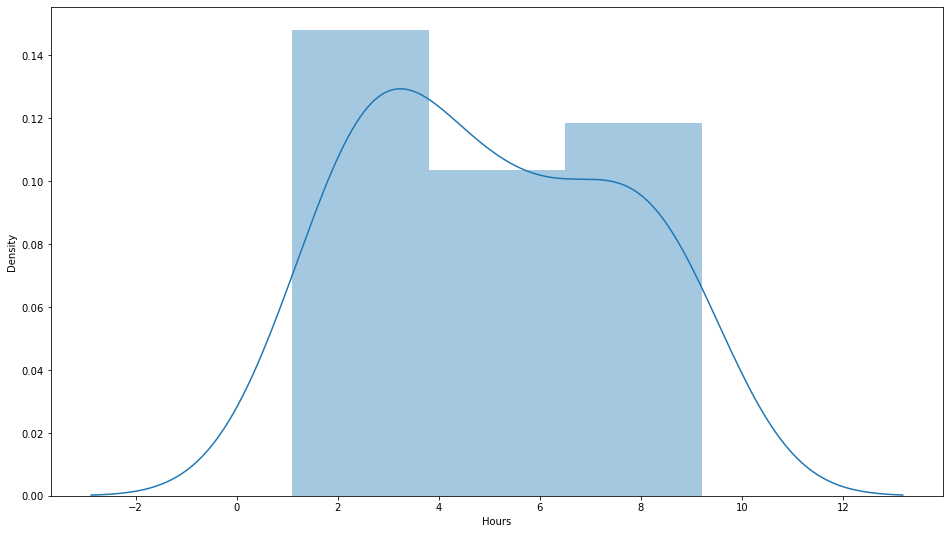

In [89]:
sns.distplot(Hours)

C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Scores', ylabel='Density'>

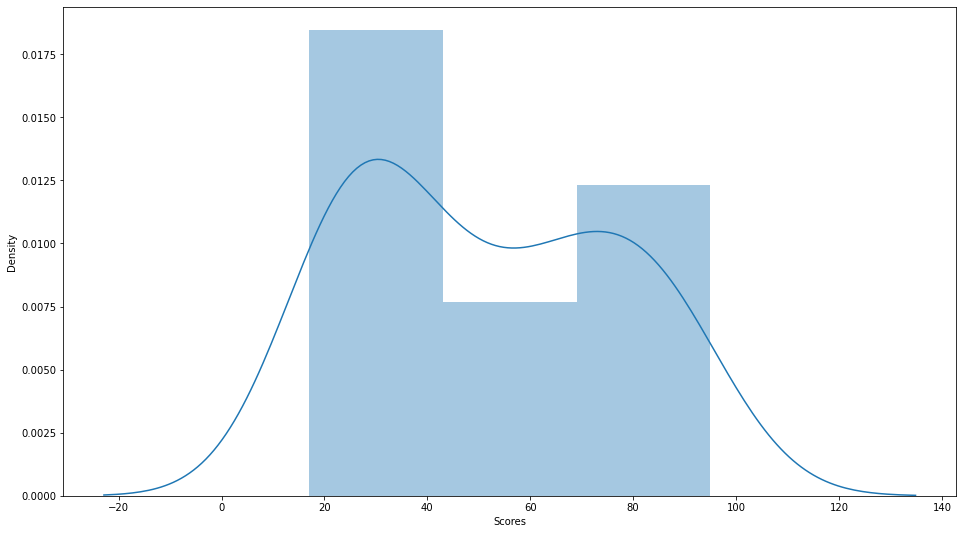

In [90]:
sns.distplot(Scores)

### Performing Simple Linear Regression

In [36]:
mean_x = np.mean(df['Hours'])
mean_y = np.mean(df['Scores'])
num = 0
den = 0
x = list(df['Hours'])
y = list(df['Scores'])
for i in range(len(df)):
    num += (x[i]-mean_x)*(y[i]-mean_y)
    den += (x[i]-mean_x)**2
B1 = num/den    

In [37]:
B1

9.775803390787475

In [38]:
B0 = mean_y - B1*mean_x

In [39]:
B0

2.4836734053731746

### Making predictions

In [46]:
df['predicted_Scores'] = B0 + B1*df['Hours']

In [47]:
df.head()

,Hours,Scores,predicted_Scores
0,2.5,21,26.923182
1,5.1,47,52.340271
2,3.2,27,33.766244
3,8.5,75,85.578002
4,3.5,30,36.698985


[]

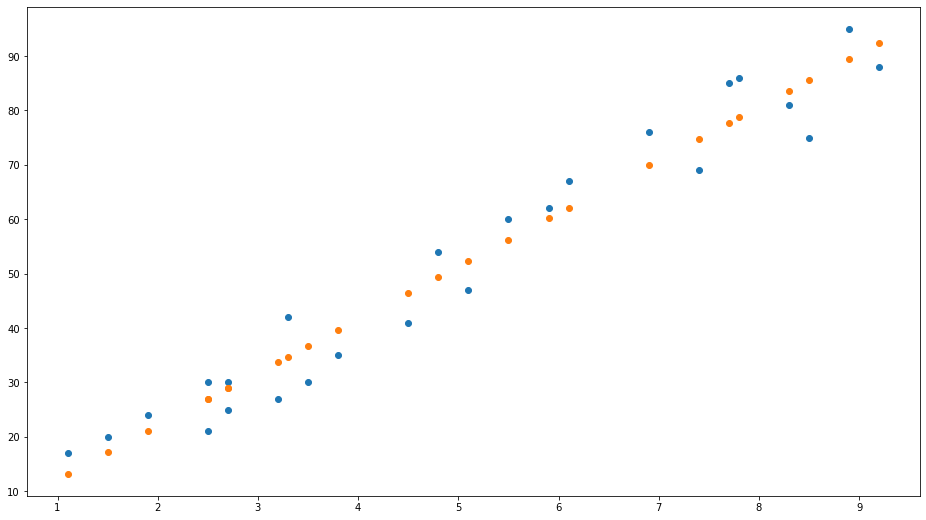

In [48]:
plt.scatter(df['Hours'], df['Scores'])
plt.scatter(df['Hours'], df['predicted_Scores'])
plt.plot()

#### Prediction of given value: 9.25

In [49]:
B0 + B1*9.25

92.90985477015732

In [50]:
y = list(df['Scores'].values)
y_pred = list(df['predicted_Scores'].values)

### RMSE

In [52]:
s = sum([(y_pred[1]-y[i])**2 for i in range(len(df))])
rmse = (np.sqrt(s/len(df)))/mean_y

In [53]:
rmse

0.48156408345640134

### OLSE

In [63]:
model = smf.ols('Scores ~ Hours' , data = df)
model = model.fit()

In [64]:
df['pred_ols'] = model.predict(df['Hours'])

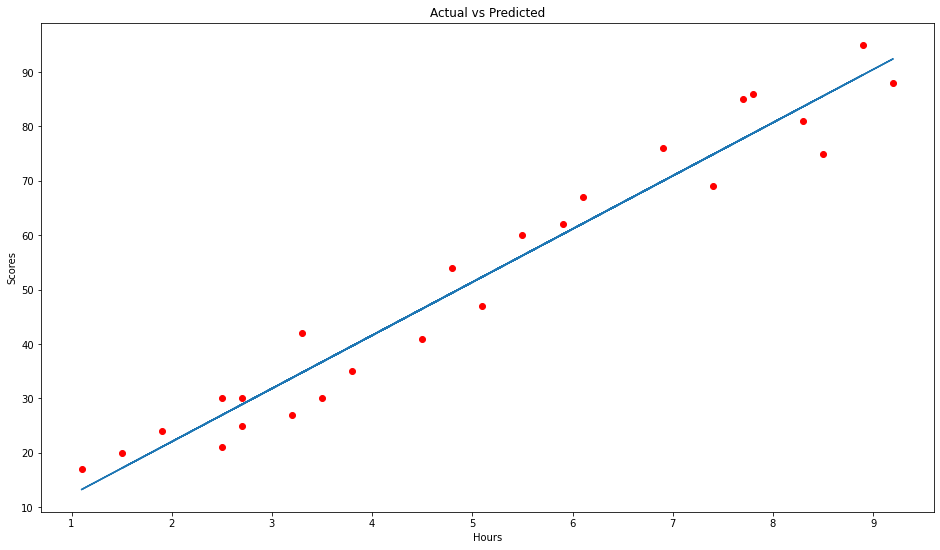

In [66]:
plt.rcParams["figure.figsize"]=[16,9]
plt.plot(df['Hours'], df['pred_ols'])
plt.plot(df['Hours'], df['Scores'], 'ro')
plt.title('Actual vs Predicted')
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.show()

### Predicted value for 9.25 hours/day is around 92